# Fraud Detection in Electricity and Gas Consumption Challenge
# Notebook 01: Data Preparation

This is a machine learning project based on the Zindi challenge [here](https://zindi.africa/learn/fraud-detection-in-electricity-and-gas-consumption-challenge-tutorial).

This first notebook covers:

- Loading the data and carrying out simple EDA to understand the data and prepare for modelling 
- Preprocessing the data and feature engineering 
- Merging invoice and client data
- Saving the data as csv as basis for other notebooks


# Data Preparation

## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import lightgbm
#from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')

## Read the Data

In [4]:
client_train = pd.read_csv('data/train/client_train.csv', low_memory=False)
invoice_train = pd.read_csv('data/train/invoice_train.csv', low_memory=False)

client_test = pd.read_csv(f'data/test/client_test.csv', low_memory=False)
invoice_test = pd.read_csv('data/test/invoice_test.csv', low_memory=False)
#sample_submission = pd.read_csv('SampleSubmission.csv', low_memory=False)

## Data Understanding and EDA

### Information about columns

#### Client data:

* Client_id: Unique id for client
* District: District where the client is
* Client_catg: Category client belongs to
* Region: Area where the client is
* Creation_date: Date client joined
* Target: fraud:1 , not fraud: 0

#### Invoice data:

* Client_id: Unique id for the client
* Invoice_date: Date of the invoice
* Tarif_type: Type of tax
* Counter_number:
* Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
* Counter_code:
* Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
* Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
* Consommation_level_1: Consumption_level_1
* Consommation_level_2: Consumption_level_2
* Consommation_level_3: Consumption_level_3
* Consommation_level_4: Consumption_level_4
* Old_index: Old index
* New_index: New index
* Months_number: Month number
* Counter_type: Type of counter

### Checking dataset size, shape and initial EDA 

In [5]:
#compare size of the various datasets
print(client_train.shape, invoice_train.shape, client_test.shape, invoice_test.shape)

(135493, 6) (4476749, 16) (58069, 5) (1939730, 16)


In [6]:
#print top rows of dataset
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [7]:
#print top rows of dataset
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [8]:
#Get a summary for all numerical columns
invoice_train.describe().round(2)

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4476749.00,4.476749e+06,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00,4476749.00
mean,20.13,1.230587e+11,172.49,7.32,1.00,410.98,109.32,20.31,52.93,17767.00,18349.70,44.83
std,13.47,1.657267e+12,133.89,1.57,0.31,757.31,1220.12,157.42,875.47,40366.93,40953.21,3128.34
min,8.00,0.000000e+00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11.00,1.211080e+05,5.00,6.00,1.00,79.00,0.00,0.00,0.00,1791.00,2056.00,4.00
50%,11.00,4.945610e+05,203.00,8.00,1.00,274.00,0.00,0.00,0.00,7690.00,8192.00,4.00
75%,40.00,1.115161e+06,207.00,9.00,1.00,600.00,0.00,0.00,0.00,21660.00,22343.00,4.00
max,45.00,2.798115e+13,600.00,413.00,50.00,999910.00,999073.00,64492.00,547946.00,2800280.00,2870972.00,636624.00


In [9]:
#Get a summary for all numerical columns
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


### Checking info for each column

In [10]:
#Get concise information of each column in dataset
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [11]:
#Get concise information of each column in dataset
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


### Checking count of unique values for each column

In [12]:
#Getting unique values on the invoice train data
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [13]:
#Getting unique values on the invoice train data
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


### Checking for empty values

In [14]:
#check for missing values
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [15]:
#check for missing values
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

No missing values in train set

### Checking target distribution in dataset

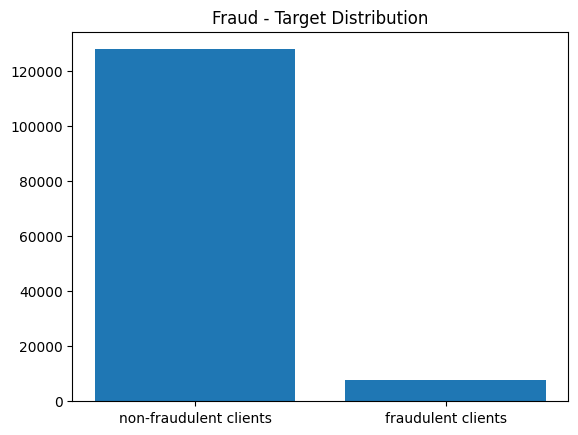

In [16]:
#Visualize fraudulent activities
fraudactivities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = ['non-fraudulent clients', 'fraudulent clients'])
plt.title('Fraud - Target Distribution')
plt.show()

Target is highly imbalanced with fewer cases of fraudulent activities (around 5.5%).

### Checking client distribution across districts and regions

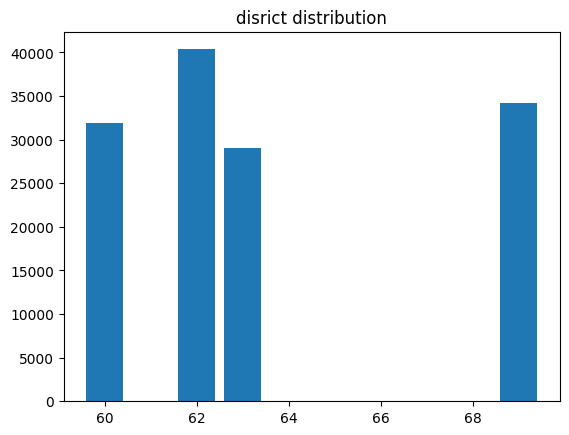

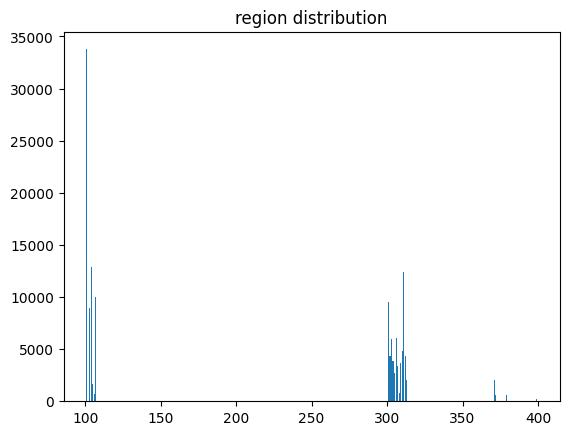

In [17]:
#Visualize client distribution across districts and regions
for col in ['disrict','region']:
    region = client_train.groupby([col])['client_id'].count()
    plt.bar(x=region.index, height=region.values)
    plt.title(col+' distribution')
    plt.show()

## Feature Engineering

### Converting of data types and encoding of categorical value for counter type

In [18]:
#convert the column invoice_date to date time format on both the invoice train and invoice test
for df in [invoice_train,invoice_test]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [19]:
#encode labels in categorical column
d={"ELEC":0,"GAZ":1}
invoice_train['counter_type']=invoice_train['counter_type'].map(d)
invoice_test['counter_type']=invoice_test['counter_type'].map(d)

In [20]:
#convert categorical columns to int for model
client_train['client_catg'] = client_train['client_catg'].astype(int)
client_train['disrict'] = client_train['disrict'].astype(int)

client_test['client_catg'] = client_test['client_catg'].astype(int)
client_test['disrict'] = client_test['disrict'].astype(int)

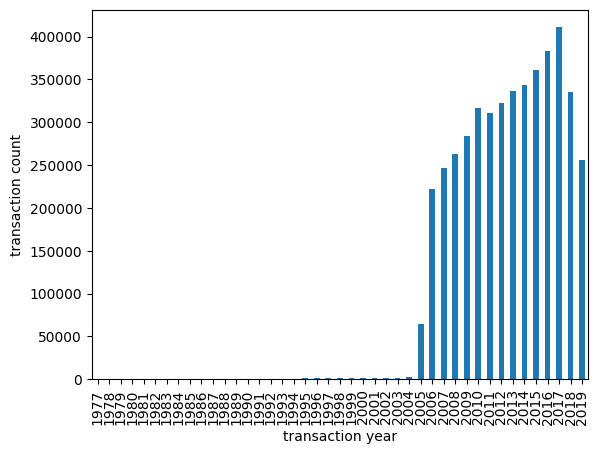

In [21]:
#Checking distribution of transaction count for each year
invoice_train.groupby(invoice_train.invoice_date.dt.year).client_id.count().plot(kind='bar', xlabel='transaction year', ylabel='transaction count');

### Check old and new index and calculate delta index

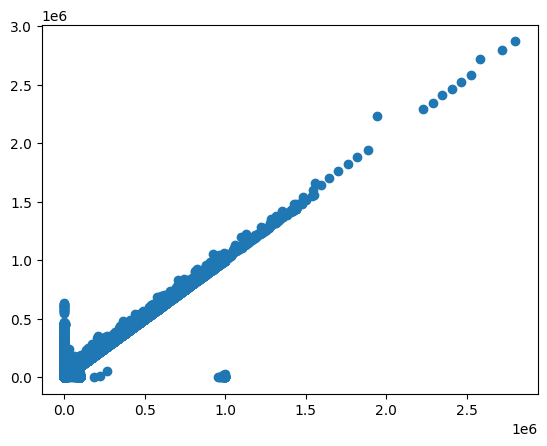

In [22]:
#Scatterplot to check correlation between old and new index
plt.scatter(x=invoice_train.old_index, y=invoice_train.new_index)

In [23]:
#Calculating difference between old and new index value
invoice_train['delta_index'] = invoice_train.new_index - invoice_train.old_index
invoice_train.drop(['old_index', 'new_index'], axis=1, inplace=True)

invoice_test['delta_index'] = invoice_test.new_index - invoice_test.old_index
invoice_test.drop(['old_index', 'new_index'], axis=1, inplace=True)

### Check data by year of transactions

In [24]:
# first left join client data to invoice data
invoice_client_train = pd.merge(invoice_train,client_train, on='client_id', how='left')

In [25]:
print(invoice_client_train.query('invoice_date.dt.year < 2005').client_id.count())
print(invoice_client_train.query('invoice_date.dt.year >= 2005').client_id.count())

22112
4454637


There are 22112 entries from before 2005 and 4454637 entries from 2005 or later.

#### Transaction count for each year - limiting data to 2005 - 2019

All 22112 invoice before 2005 don't have any frauds. So, we can drop those rows from our dataframe. Then, 4454637 invoices remain from 2005 on. 

In [26]:
#Limiting data to transactions from 2005 or later
invoice_train = invoice_train.query('invoice_date.dt.year >= 2005')

### Aggregating data of invoices for each client and merging into client table

In [27]:
def aggregate_by_client_id(invoice_data):
    ''' function to aggregate rows for each client by specified aggregation method'''
    aggs = {}
    aggs['consommation_level_1'] = ['mean']
    aggs['consommation_level_2'] = ['mean']
    aggs['consommation_level_3'] = ['mean']
    aggs['consommation_level_4'] = ['mean']
    aggs['tarif_type'] = ['mean']
    aggs['counter_number'] = ['mean']
    aggs['counter_statue'] = [pd.Series.mode]
    aggs['counter_code'] = ['mean']
    aggs['reading_remarque'] = ['mean']
    aggs['counter_coefficient'] = ['mean']
    aggs['delta_index'] = ['mean']
    aggs['months_number'] = ['mean']
    aggs['counter_type'] = [pd.Series.mode]

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='{}transactions_count'.format('1')))
    return pd.merge(df, agg_trans, on='client_id', how='left')

For aggregation of object data in the two dataframes we take the first value of the most frequent ones.

In [28]:
#group invoice data by client_id
agg_train = aggregate_by_client_id(invoice_train)
print(agg_train.shape)
agg_train.head()

(128364, 15)


,client_id,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,train_Client_0,35,352.400000,10.571429,0.000000,0.000000,11.0,1335667.0,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,train_Client_1,37,557.540541,0.000000,0.000000,0.000000,11.0,678902.0,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,train_Client_10,18,798.611111,37.888889,0.000000,0.000000,11.0,572765.0,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,train_Client_100,20,1.200000,0.000000,0.000000,0.000000,11.0,2078.0,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,train_Client_1000,14,663.714286,104.857143,117.357143,36.714286,11.0,19575.0,0,207.000000,8.857143,1.0,922.642857,3.714286,0


In [29]:
#merge aggregate data with client dataset
train = pd.merge(client_train,agg_train, on='client_id', how='left')

In [30]:
#aggregate test set
agg_test = aggregate_by_client_id(invoice_test)
test = pd.merge(client_test,agg_test, on='client_id', how='left')

In [31]:
train.shape, test.shape

((135493, 20), (58069, 19))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_id                  135493 non-null  object 
 2   client_catg                135493 non-null  int64  
 3   region                     135493 non-null  int64  
 4   creation_date              135493 non-null  object 
 5   target                     135493 non-null  float64
 6   1transactions_count        128364 non-null  float64
 7   consommation_level_1_mean  128364 non-null  float64
 8   consommation_level_2_mean  128364 non-null  float64
 9   consommation_level_3_mean  128364 non-null  float64
 10  consommation_level_4_mean  128364 non-null  float64
 11  tarif_type_mean            128364 non-null  float64
 12  counter_number_mean        128364 non-null  float64
 13  counter_statue_mode        12

### Dropping redundant columns

In [33]:
#drop redundant columns
sub_client_id = test['client_id']
drop_columns = ['client_id', 'creation_date']

for col in drop_columns:
    if col in train.columns:
        train.drop([col], axis=1, inplace=True)
    if col in test.columns:
        test.drop([col], axis=1, inplace=True)

# Checking head of train dataset after dropping
train.head()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.0,1335667.0,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.0,678902.0,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.0,572765.0,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.0,2078.0,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.0,19575.0,0,207.000000,8.857143,1.0,922.642857,3.714286,0


## Saving train and test data to csv file

In [34]:
train.to_csv('data/train.csv', index=False)

In [35]:
test.to_csv('data/test.csv', index=False)